# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Đặng Ngọc Tiến
- MSSV: 20127641
- Lớp: 20CLC11

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import thêm dữ thư viện nếu cần
from sklearn.model_selection import train_test_split



# Đọc dữ liệu

In [2]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 10 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 10 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [3]:
# Cài đặt các hàm cần thiết ở đây

# Hồi quy tuyến tính của cô Uyên dễ thương <3 
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y
        return self

    def get_params(self):
        return self.w


    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)   

# hàm tính RMSE
def rmse(y, y_hat):
    return np.sqrt(np.mean((y.ravel() - y_hat.ravel())**2))

def get_features(correlation_threshold):
    abs_corrs = np.abs(correlations)
    high_corrs = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_corrs


In [4]:
# Phần code cho yêu cầu 1a
model = OLSLinearRegression().fit(X_train, y_train)
model.get_params()


0    2.193014
1    0.817511
2   -1.149285
3   -1.505496
4   -0.268546
dtype: float64

In [5]:
# Gọi hàm RMSE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
y_hat = model.predict(X_test)
print('RMSE:', rmse(y_test, y_hat))

RMSE: 6.0483169553942515


C:\Users\Admin\AppData\Local\Temp\ipykernel_8256\486539680.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.sum(self.w.ravel() * X, axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8256\486539680.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.sqrt(np.mean((y.ravel() - y_hat.ravel())**2))


Công thức hồi quy

$$\text{Life expectancy} = 0.015101*X_1 + 0.090220*X_2 + 0.042922*X_3 + 0.139289*X_4 + (-0.567333)*X_5 + (-0.000101)*X_6 + 0.740713*X_7 + 0.190936*X_8 + 24.505974*X_9 + 2.393517*X_{10}

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [6]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

label = X_train.columns.values
list_rmse = []
n = 5
for name in label:
    if name == 'Life expectancy':
        continue

    X_train_clone = pd.Series.to_frame(X_train[name]).copy()
    y_train_clone = y_train.copy()
    train_X, test_X, train_y, test_y = train_test_split(X_train_clone, y_train_clone, shuffle = True, test_size=0.2)
    RMSE = 0
    for i in range(n):
        lr = OLSLinearRegression()
        lr.fit(train_X, train_y)
        y_pred = lr.predict(test_X)
        RMSE += rmse(test_y, y_pred)
    list_rmse.append([name, RMSE/n])


sorted_rmse = sorted(list_rmse, key=lambda x: x[1])
min_rmse = sorted_rmse[0]
print('The best feature is:', min_rmse[0])

prediction = pd.DataFrame(list_rmse, columns=['Feature', 'RMSE'])
prediction



The best feature is: Previous Scores


C:\Users\Admin\AppData\Local\Temp\ipykernel_8256\486539680.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.sum(self.w.ravel() * X, axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8256\486539680.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.sqrt(np.mean((y.ravel() - y_hat.ravel())**2))
C:\Users\Admin\AppData\Local\Temp\ipykernel_8256\486539680.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.sum(self.w.ravel() * X, axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8256\486539680.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not 

,Feature,RMSE
0,Hours Studied,26.106033
1,Previous Scores,8.608980
2,Extracurricular Activities,42.683031
3,Sleep Hours,22.485752
4,Sample Question Papers Practiced,34.069722


In [7]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_train_best = X_train[min_rmse[0]].values.reshape(-1, 1)
best_feature_model = OLSLinearRegression().fit(X_train_best, y_train)
best_feature_model.get_params()

array([0.80724882])

In [8]:
# Gọi hàm RMSE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
y_hat_best = best_feature_model.predict(X_test[min_rmse[0]].values.reshape(-1, 1))
print('RMSE:', rmse(y_test, y_hat_best))

RMSE: 8.65896679095238


C:\Users\Admin\AppData\Local\Temp\ipykernel_8256\486539680.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.sqrt(np.mean((y.ravel() - y_hat.ravel())**2))


Công thức hồi quy

$$\text{Life expectancy} = 5.5573994*X$$

# Yêu cầu 1c: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [9]:
# Phần code cho yêu cầu 1c
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

correlations = X_train.corr()
correlations = correlations.iloc[:, -1]
correlations = correlations.sort_values(ascending=False)
print(correlations)

Sample Question Papers Practiced    1.000000
Hours Studied                       0.015852
Extracurricular Activities          0.008199
Previous Scores                     0.006417
Sleep Hours                         0.005054
Name: Sample Question Papers Practiced, dtype: float64


<Axes: >

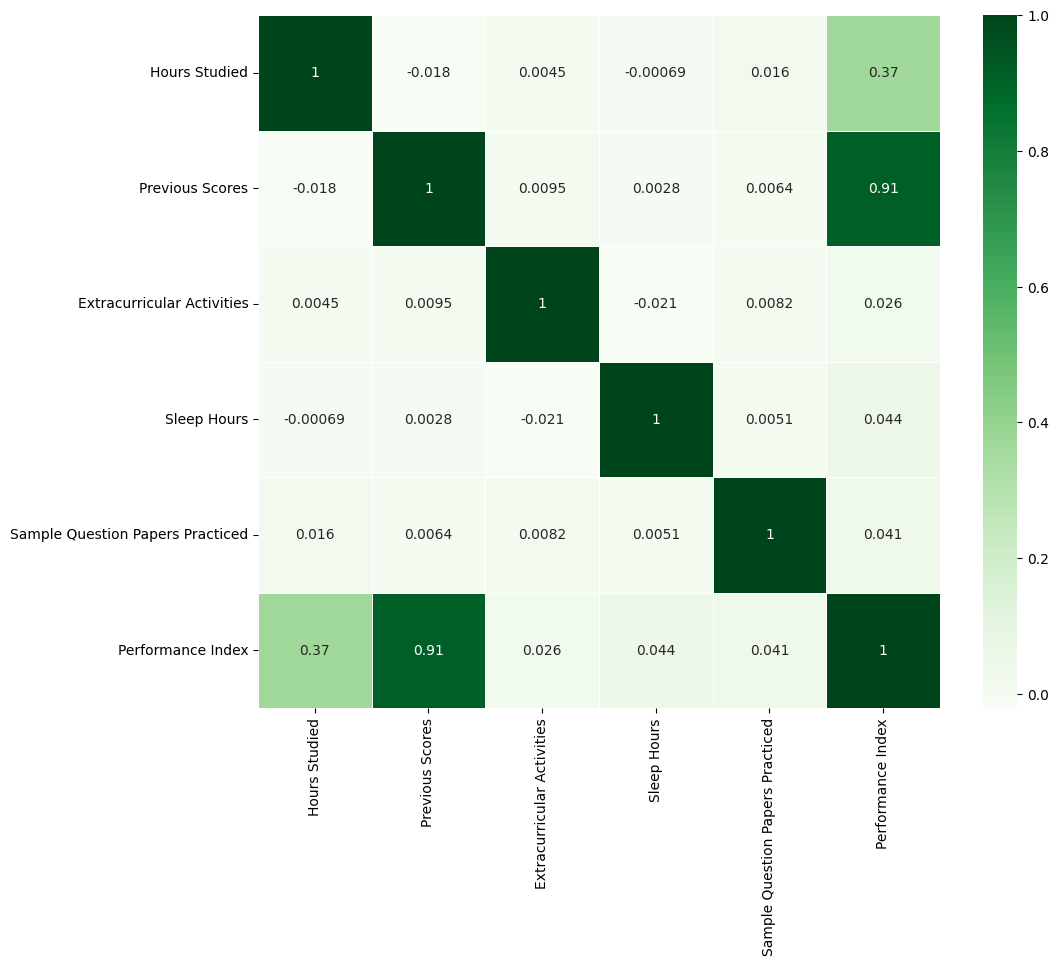

In [10]:
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_matrix,cmap="Greens", annot=True, linewidths=.5, ax = ax)

In [11]:
p1 = get_features(0.1)
p2 = get_features(0.25)
p3 = get_features(0.5)
p4 = get_features(0.75)
y_tr = y_train.copy()
p = [p1, p2, p3, p4]

models1 = []

for i in range(4):
    X_1_train = X_train[p[i]].copy()
    X_1_test = X_test[p[i]].copy()
    models1.append(['Model ' + str(i+1), X_1_train, X_1_test])

    X_sqrt_train = np.sqrt(X_train[p[i]]).copy()
    X_sqrt_test = np.sqrt(X_test[p[i]]).copy()
    models1.append(['Sqrt Model ' + str(i+1), X_sqrt_train, X_sqrt_test])

  

In [12]:
list_best = []

for mod in models1:
    train_X, test_X, train_y, test_y = train_test_split(mod[1], y_tr, shuffle = True, test_size=0.2)
    RMSE = 0
    for i in range(n):
        lr = OLSLinearRegression()
        lr.fit(train_X, train_y)
        y_pred = lr.predict(test_X)
        RMSE += rmse(test_y, y_pred)

    list_best.append([mod[0], RMSE/n])


prediction = pd.DataFrame(list_best, columns=['Feature', 'RMSE'])
prediction

C:\Users\Admin\AppData\Local\Temp\ipykernel_8256\486539680.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.sum(self.w.ravel() * X, axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8256\486539680.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.sqrt(np.mean((y.ravel() - y_hat.ravel())**2))
C:\Users\Admin\AppData\Local\Temp\ipykernel_8256\486539680.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.sum(self.w.ravel() * X, axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8256\486539680.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not 

,Feature,RMSE
0,Model 1,34.060567
1,Sqrt Model 1,28.256753
2,Model 2,33.951529
3,Sqrt Model 2,28.857101
4,Model 3,34.570715
5,Sqrt Model 3,29.468105
6,Model 4,34.479970
7,Sqrt Model 4,29.064312


In [13]:
X_best_model = np.sqrt(X_train[p[0]]).copy()
y_best_model = y_train.copy()
X_test_best_model = np.sqrt(X_test[p[0]]).copy()

lr_best_model = OLSLinearRegression()
lr_best_model.fit(X_best_model, y_best_model)
lr_best_model.get_params()

0    23.678481
dtype: float64

In [14]:
y_pred = lr_best_model.predict(X_test_best_model)
print('RMSE:', rmse(y_test, y_pred))

RMSE: 29.542557606075484


C:\Users\Admin\AppData\Local\Temp\ipykernel_8256\486539680.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.sum(self.w.ravel() * X, axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8256\486539680.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.sqrt(np.mean((y.ravel() - y_hat.ravel())**2))


Công thức hồi quy

$$\text{Life expectancy} = 14.091507*\sqrt{X_1} +  9.579369*\sqrt{X_2} +  0.552901*\sqrt{X_3} + 0.001705*\sqrt{X_4} +0.801555*\sqrt{X_5} + 0.186563*\sqrt{X_6} + (-3.208658)*\sqrt{X_7} + (-0.009331)*\sqrt{X_8} + (-0.009752)*\sqrt{X_9} +   1.818148*\sqrt{X_{10} }$$